In [45]:
# Import necessary libraries
import os
import numpy as np
import matplotlib.pyplot as plt
from shutil import copytree, rmtree
import tensorflow.keras.backend as K
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [22]:
%cd D:\mysask\AI\food-101\food-101

D:\mysask\AI\food-101\food-101


In [23]:
print("Classes of food items:\n\n")
os.listdir('D:\\mysask\\AI\\food-101\\food-101\\images')

Classes of food items:




['apple_pie',
 'baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito',
 'bruschetta',
 'caesar_salad',
 'cannoli',
 'caprese_salad',
 'carrot_cake',
 'ceviche',
 'cheesecake',
 'cheese_plate',
 'chicken_curry',
 'chicken_quesadilla',
 'chicken_wings',
 'chocolate_cake',
 'chocolate_mousse',
 'churros',
 'clam_chowder',
 'club_sandwich',
 'crab_cakes',
 'creme_brulee',
 'croque_madame',
 'cup_cakes',
 'deviled_eggs',
 'donuts',
 'dumplings',
 'edamame',
 'eggs_benedict',
 'escargots',
 'falafel',
 'filet_mignon',
 'fish_and_chips',
 'foie_gras',
 'french_fries',
 'french_onion_soup',
 'french_toast',
 'fried_calamari',
 'fried_rice',
 'frozen_yogurt',
 'garlic_bread',
 'gnocchi',
 'greek_salad',
 'grilled_cheese_sandwich',
 'grilled_salmon',
 'guacamole',
 'gyoza',
 'hamburger',
 'hot_and_sour_soup',
 'hot_dog',
 'huevos_rancheros',
 'hummus',
 'ice_cream',
 'lasagna',
 'lobster_bisque',
 'lobster

In [25]:
%cd D:\\mysask\\AI\\food-101\\food-101\\train

print("\nTotal number of classes of images in the train folder: ")
train_samples = os.listdir()
train_files = len(train_samples)
print(train_files)

D:\mysask\AI\food-101\food-101\train

Total number of classes of images in the train folder: 
101


In [31]:
def create_sample_data(list_food_items, source, destination):
    '''This method creates a sample subset of data from train & test datasets'''
    
    print("\nPreparing...")
    if os.path.exists(destination):
        rmtree(destination)
    os.makedirs(destination)
    for item in list_food_items :
        copytree(os.path.join(source, item), os.path.join(destination, item))
    print("\nDone!")

In [32]:
list_food_items = ['apple_pie', 'baby_back_ribs', 'baklava', 'beef_carpaccio', 'beef_tartare', 'beet_salad', 'beignets', 'bibimbap', 'bread_pudding', 'breakfast_burrito', 'bruschetta', 'caesar_salad', 'cannoli', 'caprese_salad', 'carrot_cake', 'ceviche', 'cheesecake', 'cheese_plate', 'chicken_curry', 'chicken_quesadilla', 'chicken_wings', 'chocolate_cake', 'chocolate_mousse', 'churros', 'clam_chowder', 'club_sandwich', 'crab_cakes', 'creme_brulee', 'croque_madame', 'cup_cakes', 'deviled_eggs', 'donuts', 'dumplings', 'edamame', 'eggs_benedict', 'escargots', 'falafel', 'filet_mignon', 'fish_and_chips', 'foie_gras', 'french_fries', 'french_onion_soup', 'french_toast', 'fried_calamari', 'fried_rice', 'frozen_yogurt', 'garlic_bread', 'gnocchi', 'greek_salad', 'grilled_cheese_sandwich', 'grilled_salmon', 'guacamole', 'gyoza', 'hamburger', 'hot_and_sour_soup', 'hot_dog', 'huevos_rancheros', 'hummus', 'ice_cream', 'lasagna', 'lobster_bisque', 'lobster_roll_sandwich', 'macaroni_and_cheese', 'macarons', 'miso_soup', 'mussels', 'nachos', 'omelette', 'onion_rings', 'oysters', 'pad_thai', 'paella', 'pancakes', 'panna_cotta', 'peking_duck', 'pho', 'pizza', 'pork_chop', 'poutine', 'prime_rib', 'pulled_pork_sandwich', 'ramen', 'ravioli', 'red_velvet_cake', 'risotto', 'samosa', 'sashimi', 'scallops', 'seaweed_salad', 'shrimp_and_grits', 'spaghetti_bolognese', 'spaghetti_carbonara', 'spring_rolls', 'steak', 'strawberry_shortcake', 'sushi', 'tacos', 'takoyaki', 'tiramisu', 'tuna_tartare', 'waffles']
len(list_food_items)

101

In [83]:

source_train = 'train'
destination_train = 'train_new'
source_test = 'test_data'
destination_test = 'test_new'

print("Creating train data folder with new classes")
create_sample_data(list_food_items, source_train, destination_train)

print("\nCreating test data folder with new classes")
create_sample_data(list_food_items, source_test, destination_test)

Creating train data folder with new classes

Preparing...

Done!

Creating test data folder with new classes

Preparing...

Done!


In [84]:
K.clear_session()
n_classes = 101
img_width, img_height = 299, 299
train_data_dir = 'D:\\mysask\\AI\\food-101\\food-101\\train_new'
validation_data_dir = 'D:\\mysask\\AI\\food-101\\food-101\\test_new'
nb_train_samples = 2250    
nb_validation_samples = 750    
batch_size = 16

# Image Augmentation
train_datagen = ImageDataGenerator(
                    rotation_range=40,
                    width_shift_range=0.2,
                    height_shift_range=0.2,
                    rescale=1./255,
                    shear_range=0.2,
                    zoom_range=[.8, 1],
                    horizontal_flip=True,
                    channel_shift_range=30,
                    fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')

Found 75750 images belonging to 101 classes.
Found 25250 images belonging to 101 classes.


In [34]:
from tqdm import tqdm
from PIL import Image
import torch
import torchvision
from torch.utils.tensorboard import SummaryWriter
from torchvision.models.resnet import resnet50
from torch_lr_finder import LRFinder

In [36]:
train_transforms = torchvision.transforms.Compose([
        torchvision.transforms.ColorJitter(brightness=0.1,contrast=0.1,saturation=0.1),
        torchvision.transforms.RandomAffine(15),
        torchvision.transforms.RandomHorizontalFlip(),
        torchvision.transforms.RandomRotation(15),
        torchvision.transforms.Resize((224, 224)),
        torchvision.transforms.ToTensor(),
        torchvision.transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
])
test_transforms = torchvision.transforms.Compose([
        torchvision.transforms.Resize((224, 224)),
        torchvision.transforms.ToTensor(),
        torchvision.transforms.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),
])

In [42]:
train_dataset = torchvision.datasets.ImageFolder('D:\\mysask\\AI\\food-101\\food-101\\train_new', transform=train_transforms)
test_dataset = torchvision.datasets.ImageFolder('D:\\mysask\\AI\\food-101\\food-101\\test_new/', transform=test_transforms)

In [43]:
batch_size = 64
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size, shuffle=True,
                                           num_workers=4, pin_memory=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size, shuffle=False,
                                          num_workers=4, pin_memory=True)

In [38]:
def visualize_images(dataloader):
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    figure, ax = plt.subplots(nrows=4, ncols=4, figsize=(16, 16))
    classes = list(dataloader.dataset.class_to_idx.keys())
    img_no = 0
    rows = 4
    cols = 4
    for images, labels in dataloader:
        for i in range(rows):
            for j in range(cols):
                img = np.array(images[img_no]).transpose(1, 2, 0)
                lbl = labels[img_no]

                ax[i, j].imshow((img*std)+mean)
                ax[i, j].set_title(classes[lbl])
                ax[i, j].set_axis_off()
                img_no += 1
        break

---------------------------Sample Images from the train dataset---------------------------



C:\Users\fengy\AppData\Local\Temp\ipykernel_123892\685403240.py:12: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  img = np.array(images[img_no]).transpose(1, 2, 0)
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.015686285257339505..1.0000000236034394].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-4.053115898461357e-09..1.0000000236034394].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.023529413104057317..1.0000000236034394].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [2.7418136649970393e-09..1.0000000236034394].
Clipping input data to the valid range for imshow w

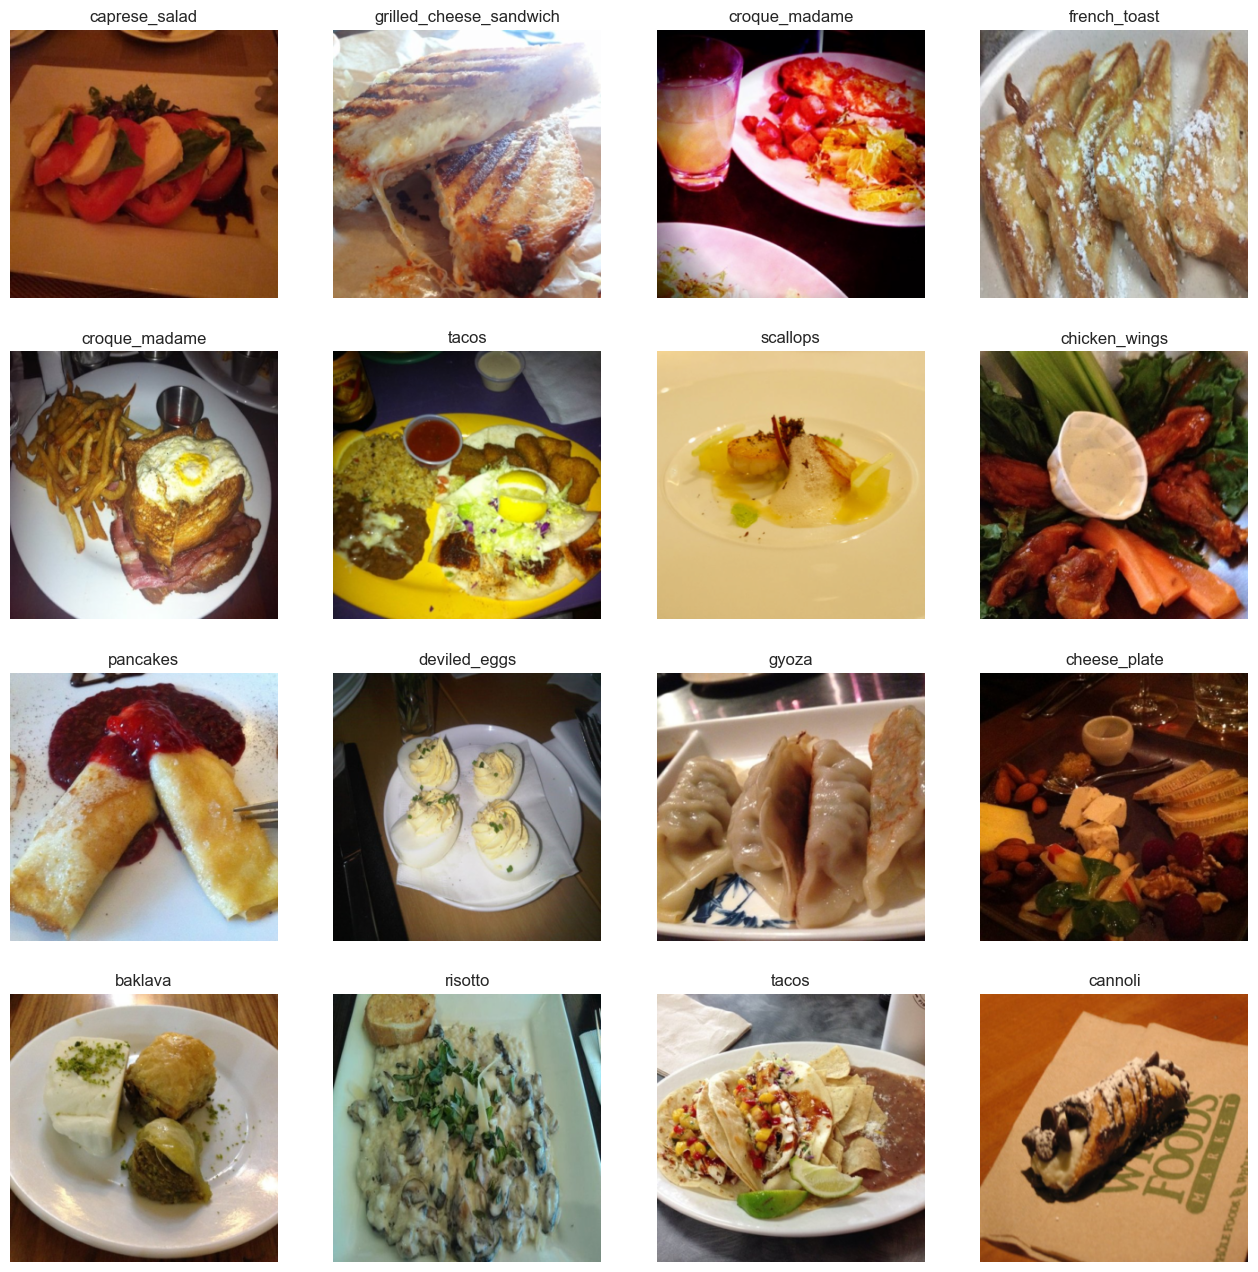

In [39]:
print("---------------------------Sample Images from the train dataset---------------------------\n")
visualize_images(train_loader)

---------------------------Sample Images from the test dataset---------------------------


C:\Users\fengy\AppData\Local\Temp\ipykernel_123892\685403240.py:12: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  img = np.array(images[img_no]).transpose(1, 2, 0)
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.019607832670211767..1.0000000236034394].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-4.053115898461357e-09..1.0000000076293944].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-4.053115898461357e-09..1.0000000236034394].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [2.7418136649970393e-09..1.0000000076293944].
Clipping input data to the valid range for imshow

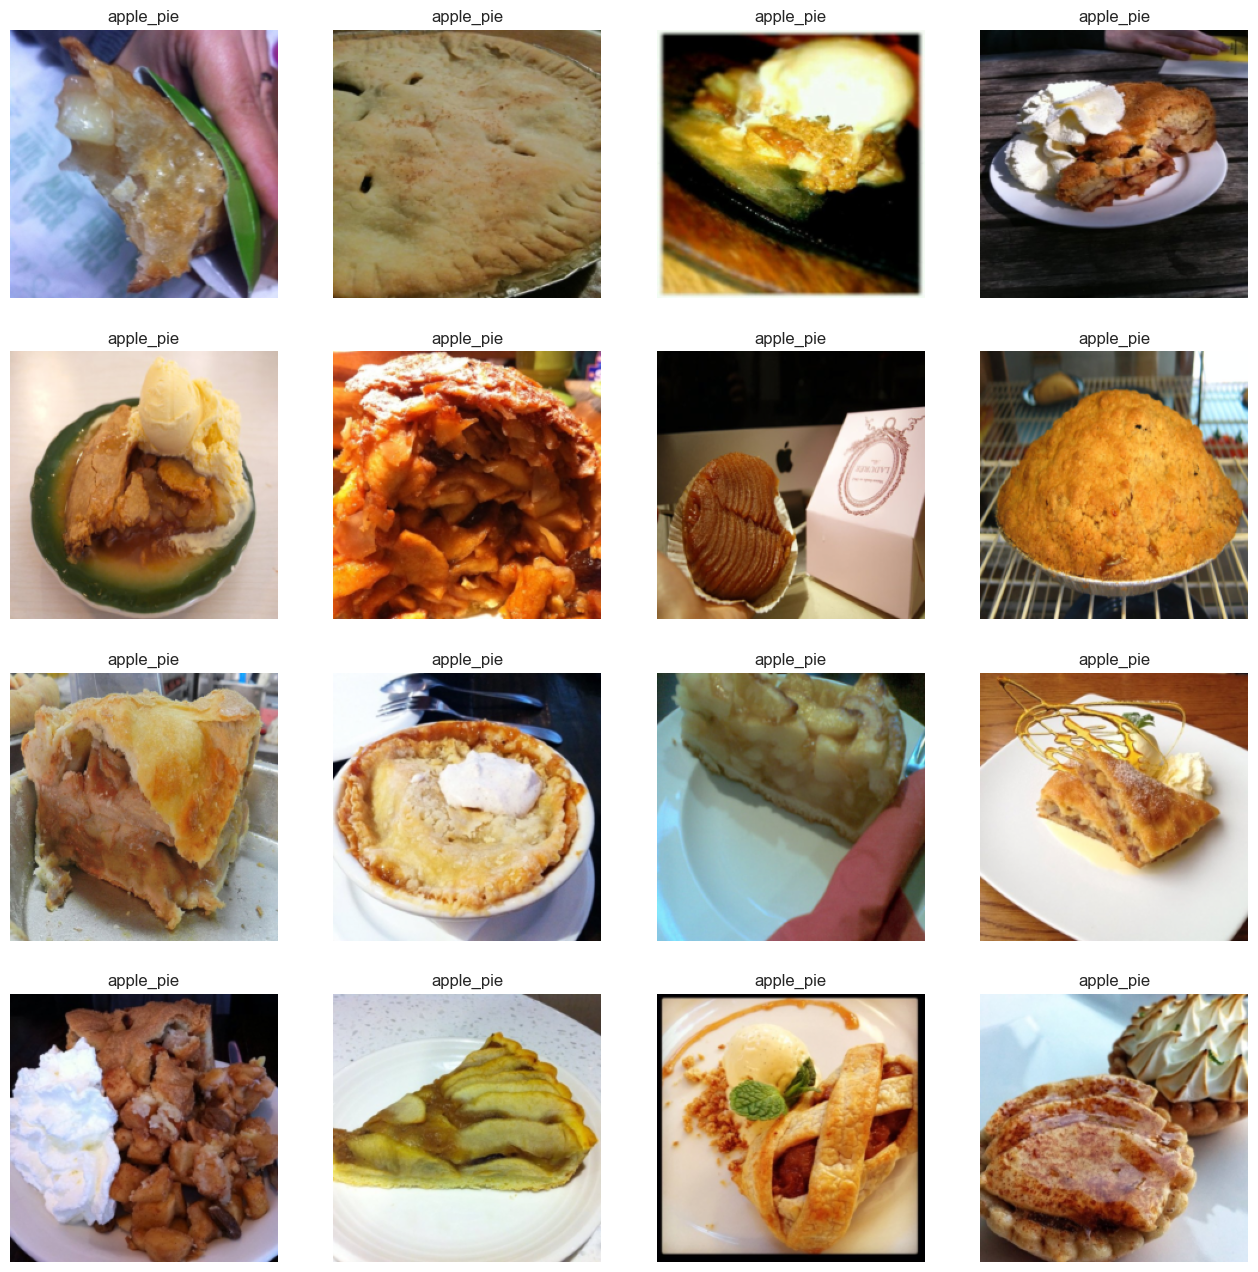

In [44]:
print("---------------------------Sample Images from the test dataset---------------------------")
visualize_images(test_loader)

In [33]:
model_resnet = resnet50(pretrained=True)

NameError: name 'resnet50' is not defined

In [ ]:
print("ResNet Model:\n")
model_resnet

In [108]:
for i, param in enumerate(model_resnet.parameters()):
    if i < 95:
        param.requires_grad=False

In [109]:
model_resnet.fc = torch.nn.Sequential(
                        torch.nn.Dropout(0.5),
                        torch.nn.Linear(2048, 101)
                  )

100%|██████████| 25/25 [01:05<00:00,  2.64s/it]


Learning rate search finished. See the graph with {finder_name}.plot()
LR suggestion: steepest gradient
Suggested LR: 3.83E-04


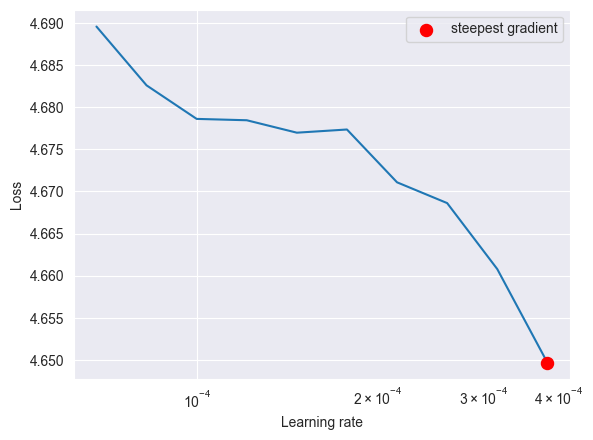

In [110]:

criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_resnet.parameters(), lr=0.00001)
lr_finder = LRFinder(model_resnet, optimizer, criterion, device="cpu")
lr_finder.range_test(train_loader, end_lr=0.001, num_iter=25)
lr_finder.plot()
lr_finder.reset()

In [ ]:
cuda = False  
epochs = 20

model_name = 'D:\\mysask\\AI\\food-101\\my_model_resnet50.pt'
optimizer = torch.optim.Adam(model_resnet.parameters(), lr=4e-5, weight_decay=0.001)
criterion = torch.nn.CrossEntropyLoss()
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', factor=0.1,
                                                       patience=1, verbose=True)

writer = SummaryWriter()  
early_stop_count = 0
ES_patience = 4
best = 0.0

# 定义 device
device = torch.device("cuda" if cuda else "cpu")
model_resnet.to(device)


In [114]:
# # training the model
# for epoch in range(epochs):
#     
#     # Training
#     model_resnet.train()
#     correct = 0
#     train_loss = 0.0
#     tbar = tqdm(train_loader, desc='Training', position=0, leave=True)
#     for i,(inp,lbl) in enumerate(tbar):
#         optimizer.zero_grad()
#         if cuda:
#             inp, lbl = inp.cuda(), lbl.cuda()
#         out = model_resnet(inp)
#         loss = criterion(out,lbl)
#         train_loss += loss
#         out = out.argmax(dim=1)
#         correct += (out == lbl).sum().item()
#         loss.backward()
#         optimizer.step()
#         tbar.set_description(f"Epoch: {epoch+1}, loss: {loss.item():.5f}, acc: {100.0*correct/((i+1)*train_loader.batch_size):.4f}%")
#     train_acc = 100.0*correct/len(train_loader.dataset)
#     train_loss /= (len(train_loader.dataset)/batch_size)
# 
#     # Validation
#     model_resnet.eval()
#     with torch.no_grad():
#         correct = 0
#         val_loss = 0.0
#         vbar = tqdm(test_loader, desc='Validation', position=0, leave=True)
#         for i,(inp,lbl) in enumerate(vbar):
#             if cuda:
#                 inp, lbl = inp.cuda(), lbl.cuda()
#             out = model_resnet(inp)
#             val_loss += criterion(out,lbl)
#             out = out.argmax(dim=1)
#             correct += (out == lbl).sum().item()
#         val_acc = 100.0*correct/len(test_loader.dataset)
#         val_loss /= (len(test_loader.dataset)/batch_size)
#     print(f'\nEpoch: {epoch+1}/{epochs}')
#     print(f'Train loss: {train_loss}, Train Accuracy: {train_acc}')
#     print(f'Validation loss: {val_loss}, Validation Accuracy: {val_acc}\n')
# 
#     scheduler.step(val_loss)
# 
#     # Write to tensorboard
#     writer.add_scalar("Loss/train", train_loss, epoch)
#     writer.add_scalar("Loss/val", val_loss, epoch)
#     writer.add_scalar("Accuracy/train", train_acc, epoch)
#     writer.add_scalar("Accuracy/val", val_acc, epoch)
# 
#     if val_acc > best:
#         best = val_acc
#         torch.save(model_resnet, model_name)
#         early_stop_count = 0
#         print('Validation Accuracy Improved, model saved.\n')
#     else:
#         early_stop_count += 1
# 
#     if early_stop_count == ES_patience:
#         print('Early Stopping Initiated...')
#         print(f'Best Validation Accuracy achieved: {best:.2f}% at epoch:{epoch-ES_patience}')
#         print(f'Model saved as {model_name}')
#         break
#     writer.flush()

Validation: 100%|██████████| 395/395 [16:41<00:00,  2.54s/it]



Epoch: 1/20
Train loss: 0.37888967990875244, Train Accuracy: 63.283168316831684
Validation loss: 0.2338515669107437, Validation Accuracy: 75.70297029702971

Validation Accuracy Improved, model saved.

D:\mysask\AI\food-101\my_model_resnet50.pt model name ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_siz

Validation: 100%|██████████| 395/395 [17:15<00:00,  2.62s/it]



Epoch: 2/20
Train loss: 0.2741244435310364, Train Accuracy: 72.13201320132013
Validation loss: 0.20244260132312775, Validation Accuracy: 78.24950495049505

Validation Accuracy Improved, model saved.

D:\mysask\AI\food-101\my_model_resnet50.pt model name ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size

Validation: 100%|██████████| 395/395 [16:02<00:00,  2.44s/it]



Epoch: 3/20
Train loss: 0.22265657782554626, Train Accuracy: 76.9927392739274
Validation loss: 0.18757399916648865, Validation Accuracy: 79.68316831683168

Validation Accuracy Improved, model saved.

D:\mysask\AI\food-101\my_model_resnet50.pt model name ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size

Validation: 100%|██████████| 395/395 [16:05<00:00,  2.44s/it]



Epoch: 4/20
Train loss: 0.1879739910364151, Train Accuracy: 80.48184818481849
Validation loss: 0.17637521028518677, Validation Accuracy: 80.58613861386138

Validation Accuracy Improved, model saved.

D:\mysask\AI\food-101\my_model_resnet50.pt model name ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size

Validation: 100%|██████████| 395/395 [16:05<00:00,  2.44s/it]



Epoch: 5/20
Train loss: 0.16062067449092865, Train Accuracy: 83.21188118811881
Validation loss: 0.1720406413078308, Validation Accuracy: 81.35841584158416

Validation Accuracy Improved, model saved.

D:\mysask\AI\food-101\my_model_resnet50.pt model name ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size

Validation: 100%|██████████| 395/395 [16:03<00:00,  2.44s/it]



Epoch: 6/20
Train loss: 0.14052645862102509, Train Accuracy: 85.2039603960396
Validation loss: 0.1718701273202896, Validation Accuracy: 81.72673267326732

Validation Accuracy Improved, model saved.

D:\mysask\AI\food-101\my_model_resnet50.pt model name ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=

Validation: 100%|██████████| 395/395 [16:00<00:00,  2.43s/it]



Epoch: 7/20
Train loss: 0.12280744314193726, Train Accuracy: 87.12871287128714
Validation loss: 0.17584852874279022, Validation Accuracy: 81.2039603960396



Validation: 100%|██████████| 395/395 [10:12<00:00,  1.55s/it]



Epoch: 8/20
Train loss: 0.10783657431602478, Train Accuracy: 88.609900990099
Validation loss: 0.17466117441654205, Validation Accuracy: 81.2910891089109



Validation: 100%|██████████| 395/395 [16:28<00:00,  2.50s/it]



Epoch: 9/20
Train loss: 0.07344531267881393, Train Accuracy: 92.75775577557756
Validation loss: 0.15494130551815033, Validation Accuracy: 83.31485148514851

Validation Accuracy Improved, model saved.

D:\mysask\AI\food-101\my_model_resnet50.pt model name ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_siz

Validation: 100%|██████████| 395/395 [16:58<00:00,  2.58s/it]



Epoch: 10/20
Train loss: 0.06338872015476227, Train Accuracy: 94.0013201320132
Validation loss: 0.15499481558799744, Validation Accuracy: 83.18811881188118



Validation: 100%|██████████| 395/395 [11:19<00:00,  1.72s/it]



Epoch: 11/20
Train loss: 0.05867968127131462, Train Accuracy: 94.51617161716172
Validation loss: 0.1541326344013214, Validation Accuracy: 83.45742574257426

Validation Accuracy Improved, model saved.

D:\mysask\AI\food-101\my_model_resnet50.pt model name ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_siz

Validation: 100%|██████████| 395/395 [16:00<00:00,  2.43s/it]



Epoch: 12/20
Train loss: 0.054953742772340775, Train Accuracy: 94.91749174917491
Validation loss: 0.15440137684345245, Validation Accuracy: 83.38613861386139



Validation: 100%|██████████| 395/395 [10:17<00:00,  1.56s/it]



Epoch: 13/20
Train loss: 0.050475794821977615, Train Accuracy: 95.4943894389439
Validation loss: 0.15431377291679382, Validation Accuracy: 83.48514851485149

Validation Accuracy Improved, model saved.

D:\mysask\AI\food-101\my_model_resnet50.pt model name ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_si

Validation: 100%|██████████| 395/395 [10:23<00:00,  1.58s/it]



Epoch: 14/20
Train loss: 0.047573503106832504, Train Accuracy: 95.84554455445544
Validation loss: 0.15410350263118744, Validation Accuracy: 83.42574257425743



Validation: 100%|██████████| 395/395 [10:18<00:00,  1.57s/it]



Epoch: 15/20
Train loss: 0.04712006822228432, Train Accuracy: 95.82046204620463
Validation loss: 0.15451651811599731, Validation Accuracy: 83.37029702970297



Validation: 100%|██████████| 395/395 [10:19<00:00,  1.57s/it]



Epoch: 16/20
Train loss: 0.04660891368985176, Train Accuracy: 95.87062706270628
Validation loss: 0.15379980206489563, Validation Accuracy: 83.58811881188119

Validation Accuracy Improved, model saved.

D:\mysask\AI\food-101\my_model_resnet50.pt model name ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_si

Validation: 100%|██████████| 395/395 [13:31<00:00,  2.05s/it]



Epoch: 17/20
Train loss: 0.04575023427605629, Train Accuracy: 96.06996699669968
Validation loss: 0.1538352370262146, Validation Accuracy: 83.47722772277228



Validation: 100%|██████████| 395/395 [14:28<00:00,  2.20s/it]



Epoch: 18/20
Train loss: 0.045444998890161514, Train Accuracy: 96.05676567656765
Validation loss: 0.15432332456111908, Validation Accuracy: 83.55247524752475



Validation: 100%|██████████| 395/395 [13:54<00:00,  2.11s/it]



Epoch: 19/20
Train loss: 0.044805098325014114, Train Accuracy: 96.18217821782179
Validation loss: 0.15325108170509338, Validation Accuracy: 83.59603960396039

Validation Accuracy Improved, model saved.

D:\mysask\AI\food-101\my_model_resnet50.pt model name ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_s

Validation: 100%|██████████| 395/395 [12:47<00:00,  1.94s/it]


Epoch: 20/20
Train loss: 0.04480086639523506, Train Accuracy: 96.16501650165017
Validation loss: 0.153484508395195, Validation Accuracy: 83.46534653465346



In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models, transforms, datasets

# 1. Load the saved model (ensure the entire model was saved)
model_path = 'D:\\mysask\\AI\\food-101\\my_model_resnet50.pt'
model = torch.load(model_path, map_location=torch.device('cpu'), weights_only=False)

# 2. Decide which layers to fine-tune, e.g., only fine-tune the last fully connected layer
for param in model.parameters():
    param.requires_grad = False
for param in model.fc.parameters():
    param.requires_grad = True

# 3. Define the optimizer and loss function (set a lower learning rate for fine-tuning)
optimizer = optim.Adam(model.fc.parameters(), lr=1e-5)
criterion = nn.CrossEntropyLoss()

# 4. Data preprocessing and loading data (example, for reference)
data_transforms = transforms.Compose([
    transforms.Resize((299, 299)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

train_dataset = datasets.ImageFolder('D:\\mysask\\AI\\food-101\\food-101\\train_new', transform=data_transforms)
val_dataset = datasets.ImageFolder('D:\\mysask\\AI\\food-101\\food-101\\test_new', transform=data_transforms)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=16, shuffle=False)

# 5. Further training (fine-tuning)
num_epochs = 5  # Number of epochs for further training, set as needed
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    running_corrects = 0

    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * inputs.size(0)
        preds = torch.argmax(outputs, dim=1)
        running_corrects += torch.sum(preds == labels.data)

    epoch_loss = running_loss / len(train_dataset)
    epoch_acc = running_corrects.double() / len(train_dataset)

    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}, Accuracy: {epoch_acc:.4f}')


Epoch 1/5, Loss: 0.7079, Accuracy: 0.8538
Epoch 2/5, Loss: 0.6625, Accuracy: 0.8557
Epoch 3/5, Loss: 0.6319, Accuracy: 0.8560
Epoch 4/5, Loss: 0.6053, Accuracy: 0.8580
Epoch 5/5, Loss: 0.5921, Accuracy: 0.8568


In [7]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models, transforms, datasets

# Assume you have already loaded the trained model
model_path = 'D:\\mysask\\AI\\food-101\\my_model_resnet50.pt'
model = torch.load(model_path, map_location=torch.device('cpu'), weights_only=False)
# If you saved the state_dict, construct the model structure first and then load:
# model = models.resnet50(pretrained=False)
# model.fc = nn.Sequential(
#     nn.Dropout(0.5),
#     nn.Linear(2048, 101)  # 101 classes
# )
# model.load_state_dict(torch.load(model_path, map_location=torch.device('cpu')))

# 1. Unfreeze the last part of the layers (e.g., layer4 and fc)
for name, param in model.named_parameters():
    if "layer4" in name or "fc" in name:
        param.requires_grad = True
    else:
        param.requires_grad = False

# 2. Define the optimizer, update only the trainable parameters
optimizer = optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=1e-5)
# Consider using a learning rate scheduler to adjust the learning rate based on validation loss
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=2)

criterion = nn.CrossEntropyLoss()

# 3. Data preprocessing and data loading (adjust according to your data directory)
data_transforms = transforms.Compose([
    transforms.Resize((299, 299)),
    transforms.ToTensor(),
    # Normalization parameters can be adjusted based on the pre-training setup, commonly used for ResNet:
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

train_dataset = datasets.ImageFolder('D:\\mysask\\AI\\food-101\\food-101\\train_new', transform=data_transforms)
val_dataset = datasets.ImageFolder('D:\\mysask\\AI\\food-101\\food-101\\test_new', transform=data_transforms)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=16, shuffle=False)

# 4. Continue training (fine-tuning)
num_epochs = 10  # Adjust the number of epochs for fine-tuning as needed

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    running_corrects = 0

    for inputs, labels in train_loader:
        inputs = inputs.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * inputs.size(0)
        preds = torch.argmax(outputs, dim=1)
        running_corrects += torch.sum(preds == labels.data)

    epoch_loss = running_loss / len(train_dataset)
    epoch_acc = running_corrects.double() / len(train_dataset)

    # Validation phase
    model.eval()
    val_loss = 0.0
    val_corrects = 0
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs = inputs.to(device)
            labels = labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item() * inputs.size(0)
            preds = torch.argmax(outputs, dim=1)
            val_corrects += torch.sum(preds == labels.data)

    val_epoch_loss = val_loss / len(val_dataset)
    val_epoch_acc = val_corrects.double() / len(val_dataset)

    print(f'Epoch {epoch+1}/{num_epochs}, Train Loss: {epoch_loss:.4f}, Train Acc: {epoch_acc:.4f}, '
          f'Val Loss: {val_epoch_loss:.4f}, Val Acc: {val_epoch_acc:.4f}')

    # Adjust learning rate
    scheduler.step(val_epoch_loss)


Epoch 1/10, Train Loss: 0.5901, Train Acc: 0.8623, Val Loss: 0.5482, Val Acc: 0.8519
Epoch 2/10, Train Loss: 0.4379, Train Acc: 0.8996, Val Loss: 0.5451, Val Acc: 0.8512
Epoch 3/10, Train Loss: 0.3314, Train Acc: 0.9259, Val Loss: 0.5642, Val Acc: 0.8507
Epoch 4/10, Train Loss: 0.2513, Train Acc: 0.9467, Val Loss: 0.5653, Val Acc: 0.8515
Epoch 5/10, Train Loss: 0.1872, Train Acc: 0.9623, Val Loss: 0.5918, Val Acc: 0.8482
Epoch 6/10, Train Loss: 0.1176, Train Acc: 0.9812, Val Loss: 0.5634, Val Acc: 0.8550
Epoch 7/10, Train Loss: 0.1048, Train Acc: 0.9836, Val Loss: 0.5561, Val Acc: 0.8564
Epoch 8/10, Train Loss: 0.0965, Train Acc: 0.9856, Val Loss: 0.5573, Val Acc: 0.8566
Epoch 9/10, Train Loss: 0.0895, Train Acc: 0.9872, Val Loss: 0.5652, Val Acc: 0.8564


KeyboardInterrupt: 

In [16]:
import torch
from torchvision import transforms
from PIL import Image


model_path = 'D:\\mysask\\AI\\food-101\\my_model_resnet50.pt'
model = torch.load(model_path, map_location=torch.device('cpu'), weights_only=False)
model.eval()

# load class name method
def load_class_names(filepath):
    with open(filepath, 'r', encoding='utf-8') as f:
        class_names = [line.strip() for line in f if line.strip()]
    return class_names

# load all classes
class_names = load_class_names('D:\\mysask\\AI\\food-101\\food-101\\meta\\classes.txt')

# preprocess the images
preprocess = transforms.Compose([
    transforms.Resize((299, 299)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

# load one pic
img_path = 'D:\\144404.jpg'
img = Image.open(img_path).convert('RGB')
img_tensor = preprocess(img).unsqueeze(0)  

# pred
with torch.no_grad():
    output = model(img_tensor)

    _, pred = torch.max(output, 1)

# show res
predicted_class = class_names[pred.item()]
print("The image should be:", predicted_class)


The image should be: samosa


In [14]:
from openai import OpenAI

client = OpenAI(api_key="sk-4e98eb1df2dc496dbf9cf38f1aa8320e", base_url="https://api.deepseek.com")
physicalCondition = 'high blood pressure'
response = client.chat.completions.create(
    model="deepseek-chat",
    messages=[
        {"role": "user", "content": f"i have '{physicalCondition}' , and i want to know is that ok for me to eat '{predicted_class}' without explanation and further questions"},
    ],
    stream=True
)

# Iterate through the stream of events to get the full content
full_content = ""
for chunk in response:
    # Access the content from the chunk directly as chunk.choices[0].delta.content
    # instead of using get() method.
    # If chunk.choices[0].delta.content is None, use an empty string.
    content = chunk.choices[0].delta.content if chunk.choices[0].delta.content is not None else ""
    full_content += content
import re
# convert from markdown to text
def markdown_to_text(markdown_text):
    text = re.sub(r'^#+ ', '', markdown_text)
    text = re.sub(r'\*\*|__|~|`', '', text)
    text = re.sub(r'^\* ', '', text, flags=re.MULTILINE)
    text = re.sub(r'\[.*?\]\(.*?\)', '', text)
    return text.strip()


full_content_text = markdown_to_text(full_content)
print(full_content_text)



If you have high blood pressure, it's best to avoid or limit eating samosas. Here’s why in simple terms:  

1. High in Salt – Samosas often contain a lot of salt, which can raise blood pressure.  
2. Fried in Oil – They are deep-fried, adding unhealthy fats that can harm heart health.  
3. Processed Ingredients – The pastry and fillings may have preservatives or excess sodium.  

If you really want to eat samosa, try:  
- A baked version (not fried)  
- A small portion (not daily)  
- Pairing it with vegetables to balance the meal  

For better snacks, choose unsalted nuts, fruits, or yogurt instead. Always check with your doctor for personalized advice.  

Would you like healthier snack alternatives? 😊
